### 聚类算法实践
- Kmeans与Dbscan算法
- 半监督问题解决方案
- 聚类评估方法

![title](./img/1.png)

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### Kmeans

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]])

blob_std =np.array([0.4,0.3,0.1,0.1,0.1]) 

In [3]:
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                     cluster_std = blob_std,random_state=7)

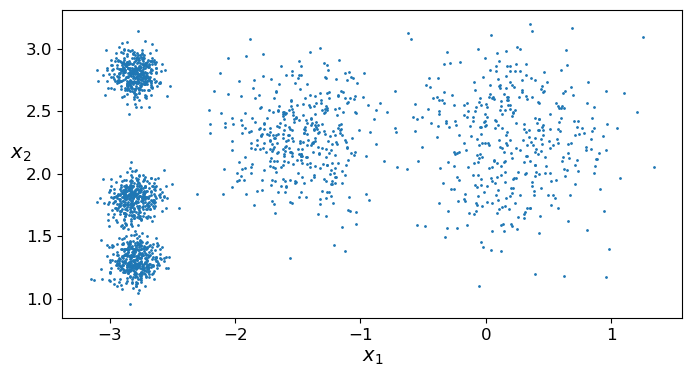

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 决策边界

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

fit_predict(X)与kmans.labels得到预测结果是一致的

In [6]:
y_pred

array([2, 2, 4, ..., 1, 4, 2])

In [7]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

In [8]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [9]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1])

In [12]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=1)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

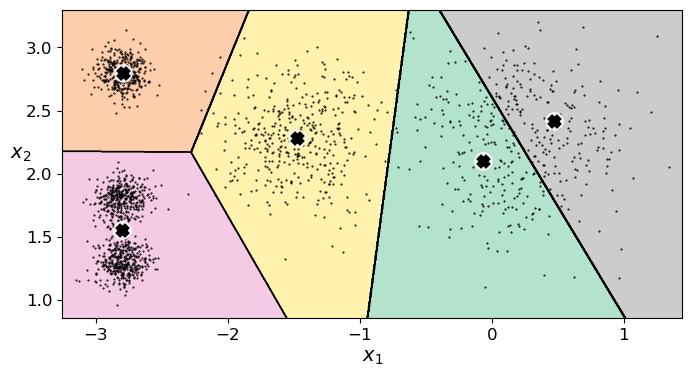

In [19]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

### 算法流程

In [20]:
kmeans_iter1 = KMeans(n_clusters=5,init='random',n_init=1, max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters=5,init='random',n_init=1, max_iter=2,random_state=1)
kmeans_iter3 = KMeans(n_clusters=5,init='random',n_init=1, max_iter=3,random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

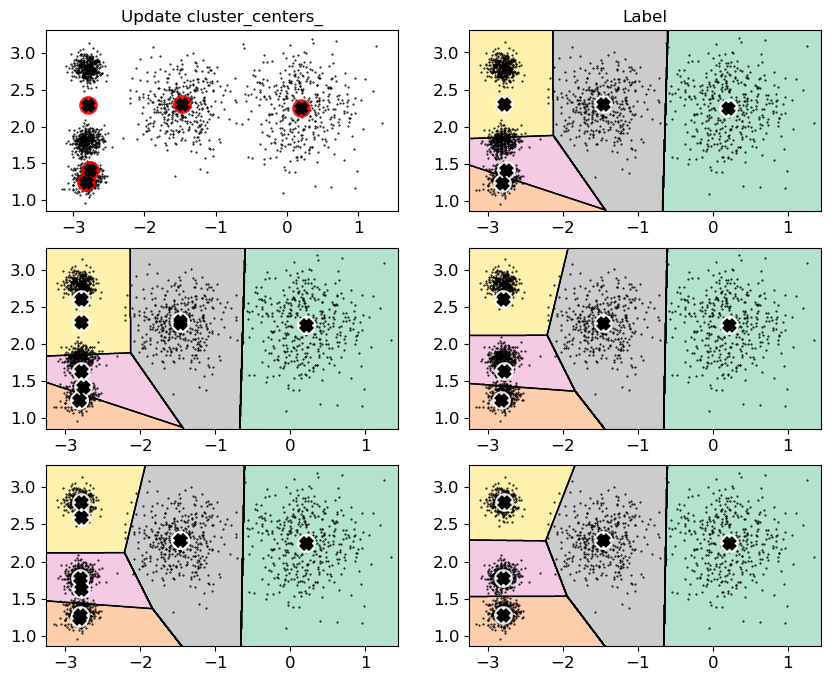

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers_')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X,show_xlabels=False, show_ylabels=False)

plt.show()

### 不稳定的结果

In [27]:
def plot_clusterer_comparison(c1,c22,X):
    c1.fit(X)
    c2.fit(X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_decision_boundaries(c1,X)
    plt.subplot(122)
    plot_decision_boundaries(c2,X)

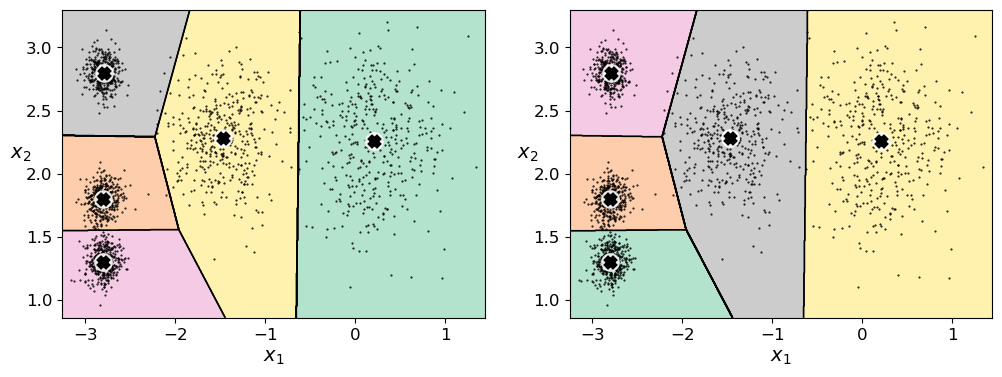

In [28]:
c1 = KMeans(n_clusters=5,init='random',n_init=1,random_state=42)
c2 = KMeans(n_clusters=5,init='random',n_init=1,random_state=19)
plot_clusterer_comparison(c1, c2, X)

### 评估方法
- Inertia指标：每个样本与其质心的距离

In [29]:
kmeans.inertia_

224.07433122515727

In [31]:
X_dist = kmeans.transform(X)

In [33]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

In [34]:
X_dist[np.arange(len(X_dist)),kmeans.labels_]

array([0.23085922, 0.26810747, 1.33653447, ..., 0.06769209, 0.23020951,
       0.43658314])

In [35]:
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_] ** 2)

224.07433122515744

In [36]:
kmeans.score(X)

-224.0743312251573

In [37]:
c1.inertia_

211.5985372581684

In [38]:
c2.inertia_

211.5985372581684

### 找到最佳簇数

如果k值越大，得到的结果肯定会越来越小！！！

In [41]:
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

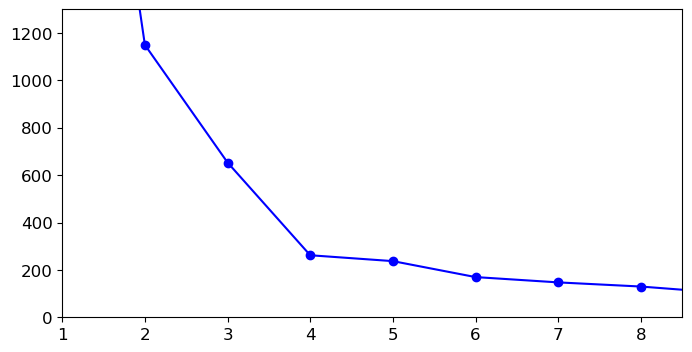

In [44]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,'bo-')
plt.axis([1,8.5,0,1300])
plt.show()

### 轮廓系数

- $ai$: 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- $bi$: 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}

![title](./img/3.png)

结论：
- si接近1，则说明样本i聚类合理；

- si接近-1，则说明样本i更应该分类到另外的簇；

- 若si 近似为0，则说明样本i在两个簇的边界上。

In [45]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.6267891051050735

In [46]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [47]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.618858196925946,
 0.6027611425418072,
 0.565539388255831,
 0.5911144503137685,
 0.5661946395774896]

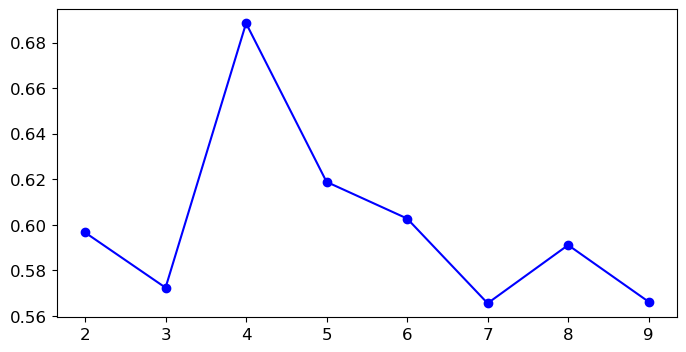

In [49]:
plt.figure(figsize=(8,4))
plt.plot(range(2,10),silhouette_scores,'bo-')
# plt.axis([1,8.5,0,1300])
plt.show()

### Kmeans存在的问题

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [ ]:
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init=1,random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))

### 图像分割小例子

In [ ]:
#ladybug.png
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape

In [ ]:
X = image.reshape(-1,3)
X.shape

In [ ]:
kmeans = KMeans(n_clusters = 8,random_state=42).fit(X)

In [ ]:
kmeans.cluster_centers_

In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)

In [ ]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{}colors'.format(n_clusters))

### 半监督学习

首先，让我们将训练集聚类为50个集群，
然后对于每个聚类，让我们找到最靠近质心的图像。 我们将这些图像称为代表性图像：

In [ ]:
from sklearn.datasets import load_digits

X_digits,y_digits = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [ ]:
X_digits_dist.shape

In [ ]:
representative_digits_idx = np.argmin(X_digits_dist,axis=0)
representative_digits_idx.shape

In [ ]:
X_representative_digits = X_train[representative_digits_idx]

现在让我们绘制这些代表性图像并手动标记它们：

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

现在我们有一个只有50个标记实例的数据集，它们中的每一个都是其集群的代表性图像，而不是完全随机的实例。 让我们看看性能是否更好：

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

但也许我们可以更进一步：如果我们将标签传播到同一群集中的所有其他实例，该怎么办？

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

In [ ]:
log_reg.score(X_test, y_test)

只选择前20个来试试

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster] #选择属于当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #排序找到前20个
    above_cutoff = (X_cluster_dist > cutoff_distance) # False True结果
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

In [ ]:
log_reg.score(X_test, y_test)

### DBSCAN

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
plt.plot(X[:,0],X[:,1],'b.')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05,min_samples=5)
dbscan.fit(X)

In [ ]:
dbscan.labels_[:10]

In [ ]:
dbscan.core_sample_indices_[:10]

In [ ]:
np.unique(dbscan.labels_)

In [ ]:
dbscan2 = DBSCAN(eps = 0.2,min_samples=5)
dbscan2.fit(X)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()